In [195]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data

In [196]:
from helper import load_data, normalize_data

data = load_data()

### Initialize your cluster centers

In [197]:
def initialize_clusters(data, k):
    """initialize the k cluster centers (the means).
    input:
        data: original data with shape (num_sample, num_feature).
        k: predefined number of clusters for the k-means algorithm.
    output:
        a numpy array with shape (k, num_feature)
    """
    _range = np.max(data, axis=0)-np.min(data, axis=0)
    _offset = np.min(data, axis=0)
    return _offset + _range*np.random.random((k, data.shape[1]))

mu = initialize_clusters(data, 2)

### Update k-means parameters

#### Build distance matrix
Build a distance matrix, collecting the distances of the original dataset to the means of the clusters.

NOTE: once you finish your `build_distance_matrix`, please copy the function to the `helper.py` function. Otherwise, the `kmeans` function will not work.

In [198]:
from scipy.spatial.distance import cdist

def build_distance_matrix(data, mu):
    """build a distance matrix.
    return
        distance matrix:
            row of the matrix represents the data point,
            column of the matrix represents the k-th cluster.
    """
    return cdist(data, mu)

dist = build_distance_matrix(data, mu)

#### Update k-means parameters

In [199]:
def update_kmeans_parameters(data, mu_old):
    """update the parameter of kmeans
    return:
        losses: loss of each data point with shape (num_samples, 1)
        assignments: assignments vector z with shape (num_samples, 1)
        mu: mean vector mu with shape (k, num_features)
    """
    
    dist = build_distance_matrix(data, mu_old)
    assignments = np.argmin(dist, axis=1)
    mu = np.zeros(mu_old.shape)
    for k in range(mu_old.shape[0]):
        #print(data[ass_min==k, :])
        if np.sum(assignments==k) != 0:
            mu[k, :] = np.mean(data[assignments==k, :], axis=0)
        else:
            mu[k, :] = mu_old[k, :]
    
    losses = np.min(build_distance_matrix(data, mu), axis=1)
    return losses, assignments, mu
    
_losses, _assignments, _mu = update_kmeans_parameters(data, mu)

#### Play with k-means

The current iteration of k-means is: 0,                the average loss is 6.117692212083597.


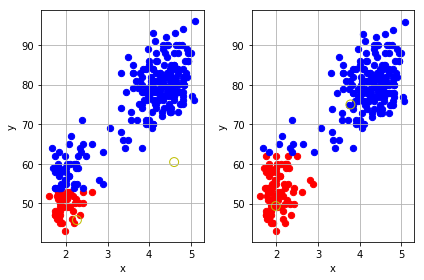

The current iteration of k-means is: 1,                the average loss is 4.726779399413207.


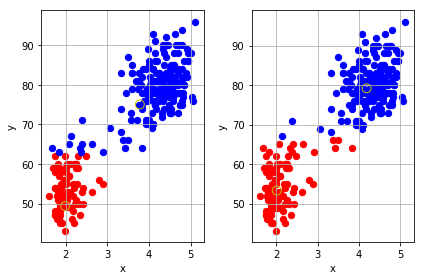

The current iteration of k-means is: 2,                the average loss is 4.679205084305819.


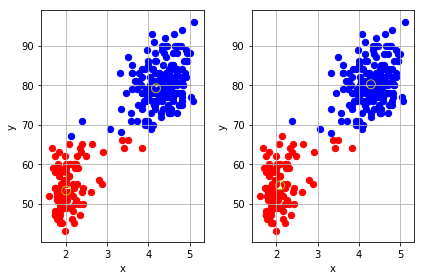

The current iteration of k-means is: 3,                the average loss is 4.68244411160236.


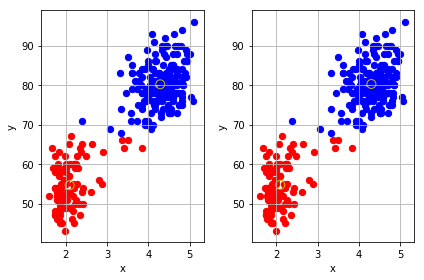

The current iteration of k-means is: 4,                the average loss is 4.68244411160236.


In [200]:
from helper import build_dir
from plots import plot

def kmeans(data, k, max_iters, threshold):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \
               the average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iter))
        # update k-means information.
        mu_old = mu

# define parameters
k = 2
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
kmeans(data, k, max_iters, threshold)

## Using k-means for image compresson

#### load image

In [206]:
from helper import load_image

image_path = "mandrill.png"
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype))

Original image: the shape of image=(480, 480, 3), the data type=uint8.


#### preprocess image

In [207]:
def preprocess_image(original_image):
    """preprocess the image."""
    processed_image = np.reshape(original_image, (-1, 3)).copy()
    return processed_image

processed_image = preprocess_image(original_image)

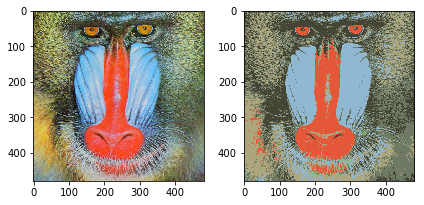

In [208]:
from plots import plot_image_compression

from helper import build_dir
from plots import plot


def kmeans(data, k, max_iters, threshold):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        #print("The current iteration of k-means is: {i}, \
        #       the average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
            
        mu_old = mu
    
    return assignments, mu


def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    # build figure dir
    build_dir(output_figure)
    # run kmeans algorithm
    assignments, mu = kmeans(processed_image, k, max_iters, threshold)
    for i, assignment in enumerate(assignments):
        processed_image[i, :] = mu[assignment, :]
        
    processed_image = np.reshape(processed_image, (original_image.shape[0], -1, 3))

    # plot histgram
    plot_image_compression(original_image, processed_image, assignments, mu, k)

# define parameters
k = 5
max_iter = 100
threshold = 1e-6

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)